> <p><small><small>This Notebook is made available subject to the licence and terms set out in the <a href = "http://www.github.com/google-deepmind/ai-foundations">AI Research Foundations Github README file</a>.

![](https://storage.googleapis.com/dm-educational/assets/ai_foundations/GDM-Labs-banner-image-C2-white-bg.png)

# Lab: Tokenize Texts Into Characters and Words


<a href='https://colab.research.google.com/github/google-deepmind/ai-foundations/blob/master/course_2/gdm_lab_2_2_tokenize_texts_into_characters_and_words.ipynb' target='_parent'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Open In Colab'/></a>

Explore how words are distributed in text data and how different **tokenization strategies** impact vocabulary size, sequence length, and downstream language models.

30 minutes



## Overview

In this lab, you will investigate the statistical distribution of tokens in natural text and explore multiple approaches to tokenization. By examining the Africa Galore dataset, you will analyze how tokens occur with varying frequencies, relate these frequencies to the phenomenon of Zipf's law, and understand why a few tokens dominate text data while most other tokens are rare.

You will then experiment with two tokenization strategies:  **character-level** and **word-level** tokenization. You will evaluate how these approaches impact both sequence length and vocabulary size and experience the trade-off between these two metrics.

### What you will learn

By the end of this lab, you will understand:

* How token frequencies in natural text follow Zipf's law.
* How preprocessing affects token counts and distributions.
* The differences between character-level and word-level tokenization.


### Tasks

In this lab, you will:

* Preprocess and count tokens in the Africa Galore dataset.
* Visualize word frequency distributions in relation to Zipf's law.
* Observe the effects of character-level versus word-level tokenization on sequence length and vocabulary size.


## How to use Google Colaboratory (Colab)

Google Colaboratory (also known as Google Colab) is a platform that allows you to run Python code in your browser. The code is written in **cells** that are executed on a remote server.

To run a cell, hover over the cell and click on the `run` button to its left. The run button is the circle with the triangle (▶). Alternatively, you can also click on a cell and use the keyboard combination Ctrl+Return (or ⌘+Return if you are using a Mac).

To try this out, run the following cell. This should print today's day of the week below it.

In [ ]:
from datetime import datetime

print(f"Today is {datetime.today():%A}.")

Note that the *order in which you run the cells matters*. When you are working through a lab, make sure to always run *all* cells in order, otherwise the code might not work. If you take a break while working on a lab, Colab may disconnect you and in that case, you have to execute all cells again before  continuing your work. To make this easier, you can select the cell you are currently working on and then choose __Runtime → Run before__  from the menu above (or use the keyboard combination Ctrl/⌘ + F8). This will re-execute all cells before the current one.

## Imports

In this lab, you will make use of the `re` module for defining more complex splitting rules and the custom `ai_foundations` package for creating visualizations and providing feedback.

Run the following cell to import the required packages.

In [1]:
%%capture
# Install the custom package for this course.
!pip install "git+https://github.com/google-deepmind/ai-foundations.git@main"

import re # For defining regular expressions.
import pandas as pd # For loading the dataset.
import textwrap # For making paragraphs more readable.
from collections import Counter # For counting tokens.

from ai_foundations import visualizations # For visualizations.
from ai_foundations.feedback.course_2 import tokenize # For providing feedback.

## Token frequencies in text data

As an AI researcher, working with datasets is one of your main tasks. As you encounter new kinds of data, it is always beneficial to understand the properties of the data. This will help you build better AI models, but it will also give you some additional insights to help you debug when your AI model is not performing as you would expect.

In this course, you will again use the [Africa Galore](https://storage.googleapis.com/dm-educational/assets/ai_foundations/africa_galore.json) dataset of synthetic short paragraphs. As part of this lab, you will uncover basic rules that govern frequency of words in text data.

In [2]:
# Load the Africa Galore dataset.
africa_galore = pd.read_json(
    "https://storage.googleapis.com/dm-educational/assets/ai_foundations/africa_galore.json"
)
dataset = africa_galore["description"].values
print("Loaded dataset with", dataset.shape[0], "paragraphs.\n")
print(f"The first paragraph is:\n{textwrap.fill(dataset[0])}")

Loaded dataset with 232 paragraphs.

The first paragraph is:
The Lagos air was thick with humidity, but the energy in the club was
electric. The band launched into a hypnotic Afrobeat groove, the drums
pounding out a complex polyrhythm, the horns blaring a soaring melody,
and the bass laying down a deep, funky foundation. A woman named Imani
moved effortlessly to the music, her body swaying in time with the
rhythm. The music seemed to flow through her, a powerful current of
energy and joy. All around her, people were dancing, singing, and
clapping, caught up in the infectious rhythm. The music was more than
just entertainment; it was a celebration of life, a connection to
their shared heritage, a vibrant expression of the soul of Lagos.


### Preprocessing text and counting tokens

Before you can analyze the contents of the dataset, you have to preprocess it. In this lab, you will perform the following two preprocessing steps:

1. Tokens with attached punctuation like "music," would be treated separately from the same token without punctuation "music" if you split the paragraphs on spaces. The `preprocess_text` function below removes punctuation to ensure that punctuation marks like commas or periods do not interfere with the tokens themselves.

2. The `preprocess_text` function converts all text to lowercase so that tokens like "The" and "the" are counted as the same token.

This preprocessing will allow you to focus on the true distribution of token frequencies.

Run the following cell to define the `preprocess_text` function and to process the Africa Galore dataset.

In [3]:
def preprocess_text(paragraphs: list[str]) -> list[str]:
    """Preprocesses a list of text paragraphs.

    This function lowercases the text and tokenizes it into individual tokens,
    removing punctuation.  It uses regular expressions for more precise
    tokenization compared to a more simple space tokenizer.

    Args:
      paragraphs: A list of strings, where each string represents a paragraph
        of text.

    Returns:
      A list of strings, where each string is a lowercase token extracted from
        the input paragraphs.
    """

    # Convert the text to lower case.
    paragraphs = [text.lower() for text in paragraphs]

    tokens_list = []
    # The regular expression (r'\b\w+\b') splits a paragraph on word boundaries
    # to remove punctuation. This breaks the text into individual words while
    # handling punctuation and spacing more precisely than a simple `.split()`.
    for paragraph in paragraphs:
        for token in re.findall(r'\b\w+\b', paragraph):
            tokens_list.append(token)
    return tokens_list


# Process all paragraphs in the dataset.
tokens_list = preprocess_text(dataset)
print(tokens_list[:10])

['the', 'lagos', 'air', 'was', 'thick', 'with', 'humidity', 'but', 'the', 'energy']


### Coding Activity 1: Compute token counts

Next, you will compute how many times each token appears in the dataset.

<br />

------
> **💻 Your task:**
>
> Complete the implementation of the `get_token_counts` function below. This function should return a [`Counter`](https://docs.python.org/3/library/collections.html#collections.Counter) object where the keys are tokens and the values are the frequency of the token in `tokens_list`.
>
------

In [9]:
def get_token_counts(tokens_list: list[str]) -> Counter[str]:
    """Calculates the frequency of each token in a list of tokens.

    Args:
      tokens_list: A list of string tokens.

    Returns:
      A Counter where keys are the unique tokens and values are their
        corresponding frequencies.
    """

    # Add your code here.
    token_counts = Counter(tokens_list)

    return token_counts

In [10]:
# @title Run this cell to test your implementation
tokenize.test_get_token_counts(get_token_counts, tokens_list)

✅ Nice! Your implementation looks correct.


Once you have successfully implemented the `get_token_counts` function, run the following cell to print the 10 most common tokens in the Africa Galore dataset.

In [11]:
token_counts = get_token_counts(tokens_list)

# Print the 10 tokens with the highest counts.
list(token_counts.most_common(10))

[('the', 1072),
 ('a', 930),
 ('and', 909),
 ('of', 634),
 ('is', 364),
 ('in', 323),
 ('with', 321),
 ('to', 258),
 ('for', 193),
 ('it', 170)]

Are you surprised that the word "the" appears most frequently in the dataset? This is a very common finding. Similar analyses have been performed on much larger English datasets [1]. As is the case here, words such as "the", "a", "and", "of", and forms of "be" (like "is") are almost always found among the 10 most common words.

What about the least common tokens in the dataset? Run the following cell to print the tail of the distribution.

In [12]:
# Print the 10 least common words in the African Galore dataset.
# Note that most_common() returns all items in descending order of their count.
list(token_counts.most_common())[-10:]

[('antarctic', 1),
 ('actually', 1),
 ('hemisphere', 1),
 ('tuxedo', 1),
 ('plumage', 1),
 ('spheniscus', 1),
 ('demersus', 1),
 ('breed', 1),
 ('algoa', 1),
 ('bay', 1)]

### Zipf's law

You will turn now to a fundamental property of language: the relationship between a token's frequency and its rank. After counting all the unique tokens in the Africa Galore dataset, you can rank them, giving rank 1 to the most frequent token, rank 2 to the second most frequent, and so on.

You might assume this distribution is random, but languages consistently follow a predictable pattern. A very small number of tokens (like "the", "a", "and") are extremely common, while the vast majority are rare, often appearing only once. This creates a "long tail" distribution.

If you tried to plot this relationship on a standard scale, the result would be unreadable. The few hyper-frequent tokens would dominate the chart, while the thousands of rare tokens would be squashed into an indistinguishable area at the bottom. The range in frequencies makes it impossible to see the underlying pattern clearly.

To solve this, you will use a **log-log plot**. By plotting the logarithm of the rank against the logarithm of the frequency, you can manage this range. A logarithmic scale compresses the distance between large values and expands the distance between small ones. This rescaling results in a much clearer view of the entire dataset at once.

Run the following cell to compute this log-log plot.

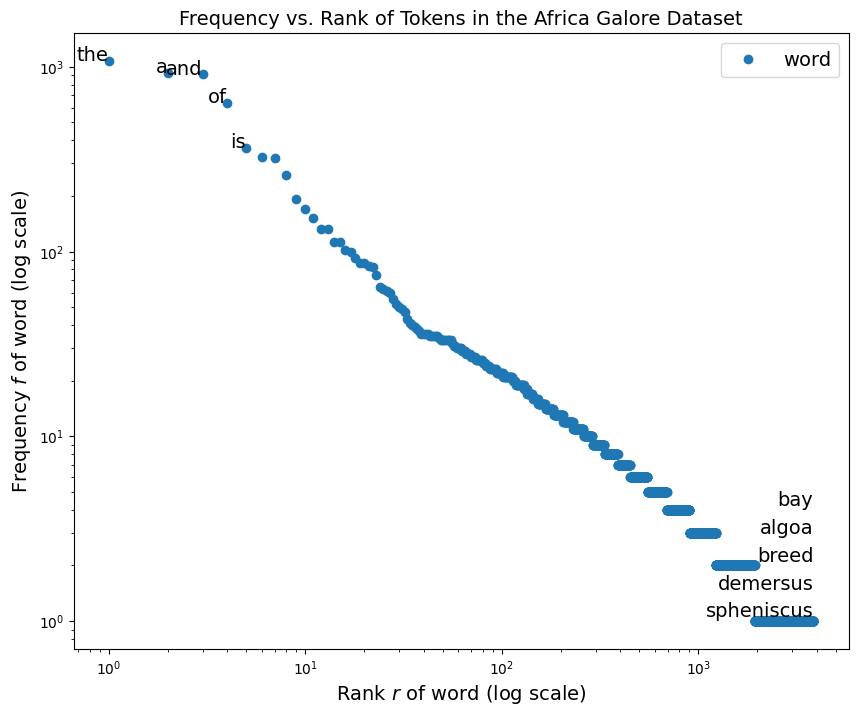

In [13]:
# Plot the word frequency vs. rank on a log-log scale,
# automatically annotating the most frequent and least frequent words.
visualizations.plot_word_frequencies(token_counts)

As you may observe, the points on the plot roughly fall along a downward-sloping straight line. This is not a coincidence. You have just visualized a famous principle in linguistics called **Zipf's law**.

<br />

------
> **ℹ️ Info: Zipf's law**
>
>Zipf's law states that a token's frequency is approximately inversely proportional to its rank. In simpler terms, the 2nd most frequent token will appear about half as often as the most frequent one, the 10th most frequent token will appear about one-tenth as often, and so on down the line. While the relationship isn't perfect in a small dataset like Africa Galore, the general trend is also recognizable here.
>
>The reason this pattern appears as a straight line on your log-log plot is due to its mathematical form. Zipf's law is expressed as:
>
>$$f \propto \frac{1}{r}$$
>
>where $f$ is the frequency and $r$ is the rank. If you take the logarithm of this relationship, you get:
>
>$$ \log(f) = -\log(r) + \text{constant}$$
>
>This is the exact formula for a line ($y = kx + b$), where $y = \log(f)$, the slope $k = -1$, and the y-intercept $b$ is a constant. This is the advantage of log-log plots. They reveal power-law relationships as simple straight lines.
>
------

<br />

Zipf's law highlights a core challenge in the processing of texts. The law guarantees that any text corpus will be dominated by a small number of very frequent tokens, while the vast majority of the vocabulary will be extremely rare. This "long tail" of infrequent tokens is a major hurdle for building language models. If a model encounters a token only a handful of times in a large dataset, it will be challenging to learn its meaning. This is a fundamental problem that AI researchers must address when training models. In the next activities, you will encounter tokenization methods that allow models to extract more meaning from very rare tokens.

## Tokenization

Once you understand the distribution of words in the data, the next step is to begin making decisions about breaking up text data into smaller "units" (tokens) which can then be translated to token IDs. These IDs can then be used as the input to your language model.

You will now explore different methods for tokenizing texts.

As a first step, take a look again at the first paragraph in the Africa Galore dataset to remind yourself what the data looks like.


In [14]:
sample_text = dataset[0]
print(textwrap.fill(sample_text))

The Lagos air was thick with humidity, but the energy in the club was
electric. The band launched into a hypnotic Afrobeat groove, the drums
pounding out a complex polyrhythm, the horns blaring a soaring melody,
and the bass laying down a deep, funky foundation. A woman named Imani
moved effortlessly to the music, her body swaying in time with the
rhythm. The music seemed to flow through her, a powerful current of
energy and joy. All around her, people were dancing, singing, and
clapping, caught up in the infectious rhythm. The music was more than
just entertainment; it was a celebration of life, a connection to
their shared heritage, a vibrant expression of the soul of Lagos.


### Character and word-level tokenization

There are many ways to break up a paragraph like the one you just printed into tokens so that it could be used as input to a language model. In this part of the lab, you will consider two methods: **character-level** tokenization and **word-level** tokenization.

#### Character-level tokenization

You can break up the paragraph into **single characters** that can then be mapped to token IDs. In this case, each unique token ID corresponds to exactly one character. As discussed in the previous article, this has the advantage of largely solving the out-of-vocabulary issue, but at the same time, it leads to very long sequences.

Run the following code snippet to print the first 10 tokens when using a character-level tokenizer.

In [15]:
def character_tokenize(text: str) -> list[str]:
    """Splits text on characters.

    Args:
      text: The text to split.

    Returns:
      A list of tokens.
    """
    tokens = list(text)
    return tokens

print(character_tokenize(dataset[0])[:10])

['T', 'h', 'e', ' ', 'L', 'a', 'g', 'o', 's', ' ']


#### Word-level tokenization

Compare this token-level tokenizer to a simple **word-level tokenizer**. The simplest way to tokenize by word is to split the text on spaces.

As already briefly discussed in 01 Build Your Own Small Language Model, such a tokenizer is very naive. When splitting on spaces, punctuation marks can be part of the token, potentially leading to many different tokens for the same word. For example, "music," (with a comma) will be a different token from "music" (without a comma).

In later parts of this course, you will explore more sophisticated approaches, such as subword tokenizers. These sometimes split text at the character and sometimes at the word level. This helps to handle issues such as this more effectively. For now, run the code snippet to explore the first 10 tokens when text is split on spaces.

In [16]:
def space_tokenize(text: str) -> list[str]:
    """Splits text on spaces.

    Args:
      text: The text to split.

    Returns:
      A list of tokens.
    """
    tokens = text.split(" ")
    return tokens

print(space_tokenize(dataset[0])[:10])

['The', 'Lagos', 'air', 'was', 'thick', 'with', 'humidity,', 'but', 'the', 'energy']


### Effect of tokenization on sequence length

The tokenization method significantly impacts both the **number of tokens** that a text is split into and the **vocabulary size**. Word-level tokenization results in fewer tokens per text but requires a larger vocabulary. Each unique word is treated as a separate token and there are many more words than there are unique characters. In contrast, character-level tokenization leads to many more tokens when tokenizing a text but uses a smaller vocabulary, as it consists only of the much smaller set of individual characters.

Run the following cells to explore how sequence length varies between character-level and word-level tokenization.

Consider the first pargraph in the dataset.

Using a character-level tokenizer, this sequence becomes:

In [17]:
tokens_char = character_tokenize(dataset[0])
print(tokens_char)
print(f"The length of the sequence is: {len(tokens_char)}")

['T', 'h', 'e', ' ', 'L', 'a', 'g', 'o', 's', ' ', 'a', 'i', 'r', ' ', 'w', 'a', 's', ' ', 't', 'h', 'i', 'c', 'k', ' ', 'w', 'i', 't', 'h', ' ', 'h', 'u', 'm', 'i', 'd', 'i', 't', 'y', ',', ' ', 'b', 'u', 't', ' ', 't', 'h', 'e', ' ', 'e', 'n', 'e', 'r', 'g', 'y', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'c', 'l', 'u', 'b', ' ', 'w', 'a', 's', ' ', 'e', 'l', 'e', 'c', 't', 'r', 'i', 'c', '.', ' ', 'T', 'h', 'e', ' ', 'b', 'a', 'n', 'd', ' ', 'l', 'a', 'u', 'n', 'c', 'h', 'e', 'd', ' ', 'i', 'n', 't', 'o', ' ', 'a', ' ', 'h', 'y', 'p', 'n', 'o', 't', 'i', 'c', ' ', 'A', 'f', 'r', 'o', 'b', 'e', 'a', 't', ' ', 'g', 'r', 'o', 'o', 'v', 'e', ',', ' ', 't', 'h', 'e', ' ', 'd', 'r', 'u', 'm', 's', ' ', 'p', 'o', 'u', 'n', 'd', 'i', 'n', 'g', ' ', 'o', 'u', 't', ' ', 'a', ' ', 'c', 'o', 'm', 'p', 'l', 'e', 'x', ' ', 'p', 'o', 'l', 'y', 'r', 'h', 'y', 't', 'h', 'm', ',', ' ', 't', 'h', 'e', ' ', 'h', 'o', 'r', 'n', 's', ' ', 'b', 'l', 'a', 'r', 'i', 'n', 'g', ' ', 'a', ' ', 's', 'o', 'a', 'r',

On the other hand, if you tokenize this sequence at the word level, it becomes:

In [18]:
tokens_word = space_tokenize(dataset[0])
print(tokens_word)
print(f"The length of the sequence is: {len(tokens_word)}")

['The', 'Lagos', 'air', 'was', 'thick', 'with', 'humidity,', 'but', 'the', 'energy', 'in', 'the', 'club', 'was', 'electric.', 'The', 'band', 'launched', 'into', 'a', 'hypnotic', 'Afrobeat', 'groove,', 'the', 'drums', 'pounding', 'out', 'a', 'complex', 'polyrhythm,', 'the', 'horns', 'blaring', 'a', 'soaring', 'melody,', 'and', 'the', 'bass', 'laying', 'down', 'a', 'deep,', 'funky', 'foundation.', 'A', 'woman', 'named', 'Imani', 'moved', 'effortlessly', 'to', 'the', 'music,', 'her', 'body', 'swaying', 'in', 'time', 'with', 'the', 'rhythm.', 'The', 'music', 'seemed', 'to', 'flow', 'through', 'her,', 'a', 'powerful', 'current', 'of', 'energy', 'and', 'joy.', 'All', 'around', 'her,', 'people', 'were', 'dancing,', 'singing,', 'and', 'clapping,', 'caught', 'up', 'in', 'the', 'infectious', 'rhythm.', 'The', 'music', 'was', 'more', 'than', 'just', 'entertainment;', 'it', 'was', 'a', 'celebration', 'of', 'life,', 'a', 'connection', 'to', 'their', 'shared', 'heritage,', 'a', 'vibrant', 'expressio

As you have likely noticed, the character-level tokenizer treats every letter, space, and punctuation mark as a separate token. This approach significantly increases the sequence length that the model must process. The first paragraph in the dataset is 685 character tokens long, while the same content can be represented using just 118 word tokens. Note, longer sequences increase memory and compute demands.

### Effect of tokenization on vocabulary size

Language models process text that has been broken down into fundamental units called **tokens**. As you have already seen, a tokenizer first converts text into a sequence of these tokens, and then into numerical IDs that the model can process. A model's **vocabulary**, that is, the complete set of all possible tokens it can process and generate, is determined during its training. Consequently, a model can neither process nor generate any token that is outside of this vocabulary.

The size of the vocabulary is a critical design choice that involves significant trade-offs.

1. A larger vocabulary allows for more information to be distributed across tokens. With a **word-level vocabulary**, tokens are whole words. The distinct meanings of "time" and "the" are captured in separate, specific token representations. Information is clearly distributed. With a **character-level vocabulary**, on the other hand, the token "t" must contribute to representing every word containing it, such as "time", "the", and "train." This forces a single token's parameters to hold a vast amount of contextual information, making it difficult for the model to learn representations that capture precise meaning.

2. A larger vocabulary **requires more parameters for a model**, which directly increases its size and computational cost. Each token needs a unique representation stored in the model's parameters. A bigger vocabulary thus leads to a larger model that demands more memory and processing power, making both training and inference slower and more expensive.

3. A larger vocabulary inevitably contains **more tokens that appear very infrequently** in the training data. The model cannot learn a reliable representation for these rare tokens because it lacks sufficient examples of their usage. This "data sparsity" problem hinders the model's ability to handle less common words or concepts effectively.


In this final cell, explore the difference in vocabulary size between the character-level and the word-level tokenizer that has been built for the Africa Galore dataset.

In [21]:
# Print the unique number of tokens in character and word level tokenization.
vocab_char = set(tokens_char)
vocab_word = set(tokens_word)
print(f"The character-level vocabulary consists of {len(vocab_char):,} tokens.")
print(f"The word-level vocabulary consists of {len(vocab_word):,} tokens.")

The character-level vocabulary consists of 32 tokens.
The word-level vocabulary consists of 83 tokens.


The character-level tokenizer vocabulary is much smaller compared to word-level tokenizer vocabulary. For character-level tokenization, the vocabulary is usually small because there are only a limited number of characters in any given language. For example, English has characters like A, B, C, etc., while Arabic has Alif, Ba, Tha (أ, ب, ت). All these characters are considered tokens in a character-level tokenizer.

Words, on the other hand, are far more diverse. Think about the vocabulary of the English language. This has been estimated to include approximately one million words [2]. That is orders of magnitude more than the number of characters used in English. In other languages with more complex writing systems such as Chinese, the difference between the number of unique characters and the number of unique words may be smaller but still substantial.

This implies that models trained on character-level tokens will require many fewer parameters but will also learn worse meaning representations. Models trained on word-level tokens require many more parameters but, at least for common words, generally learn much better meaning representations.

## Summary

In this lab, you explored in detail how character-level and simple word-level tokenizers work. You saw that the choice of tokenization unit affects both the **length of sequences** that a text is translated to and the **size of the tokenizer's vocabulary**.

A solid understanding of tokenization is essential for building and deploying effective natural language processing models. Thoughtful tokenization strategies can significantly enhance model performance and ensure robustness across diverse linguistic inputs.

In the next lab, you will experiment with Gemma's tokenizer which uses subword tokens and combines the advantages of the character-level tokenizer and the word-level tokenizer.

## Solutions

The following cells provide reference solutions to the coding activities in this notebook. If you really get stuck after trying to solve the activities yourself, you may want to consult these solutions.

It is recommended that you *only* look at the solutions after you have tried to solve the activities *multiple times*. The best way to learn challenging concepts in computer science and artificial intelligence is to debug your code piece-by-piece until it works, rather than copying existing solutions.

If you feel stuck, you may want to first try to debug your code. For example, by adding additional print statements to see what your code is doing at every step. This will provide you with a much deeper understanding of the code and the materials. It will also provide you with practice on how to solve challenging coding problems beyond this course.

To view the solutions for an activity, click on the arrow to the left of the activity name. If you consult the solutions, do not copy and paste them into the cells above. Instead, look at them, and type them manually into the cell. This will help you understand where you went wrong.


### Coding Activity 1

In [22]:
# Complete implementation of `get_token_counts`.
def get_token_counts(tokens_list: list[str]) -> Counter[str]:
    """Calculates the frequency of each token in a list of tokens.

    Args:
      tokens_list: A list of string tokens.

    Returns:
      A Counter where keys are the unique tokens and values are their
        corresponding frequencies.
    """
    token_counts = Counter(tokens_list)

    return token_counts


## References

[1] "The Oxford English Corpus: Facts about the language." OxfordDictionaries.com. _Oxford University Press_. Retrieved from: [https://web.archive.org/web/20111226085859/http://oxforddictionaries.com/words/the-oec-facts-about-the-language](https://web.archive.org/web/20111226085859/http://oxforddictionaries.com/words/the-oec-facts-about-the-language).


[2] Merriam Webster. How many words are there in English?
  Retrieved from [https://www.merriam-webster.com/help/faq-how-many-english-words](https://www.merriam-webster.com/help/faq-how-many-english-words).
